### 1. MNIST数据集

In [1]:
import pickle
import gzip
from pathlib import Path
import requests
import os

In [2]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

In [4]:
if not (PATH/FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [5]:
# 该数据集为 numpy 数组格式，并已使用pickle（一种用于序列化数据的 python 特定格式）存储。

In [8]:
with gzip.open((PATH/FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [9]:
# 每个图像为28 x 28，并存储为长度为784 = 28x28的扁平行。 让我们来看一个； 我们需要先将其重塑为 2d。

In [16]:
x_train.shape, y_train.shape

((50000, 784), (50000,))

In [18]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
x_train[0].shape

(784,)

In [15]:
from matplotlib import pyplot
import numpy as np

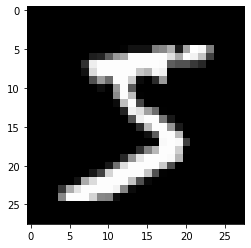

In [19]:
pyplot.imshow(x_train[0].reshape((28,28)), cmap='gray')

TypeError: Invalid shape (784,) for image data

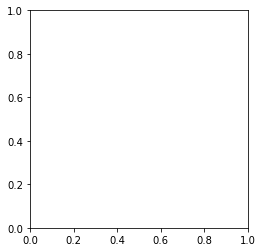

In [23]:
pyplot.imshow(x_train[0], cmap='gray')

In [24]:
import torch

In [25]:
# map(function, iterable, ...)
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [26]:
x_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [27]:
n, c = x_train.shape

In [28]:
x_train, x_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor(0),
 tensor(9))

### 2. 从零开始的神经网络（没有torch.nn）

In [29]:
import math

In [30]:
weights = torch.randn(784, 10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [31]:
def log_softmax(x):
    return x- x.exp().sum(-1).log().unsqueeze(-1)

In [32]:
def model(xb):
    return log_softmax(xb @ weights + bias)

> 在上面，@代表点积运算。 我们将对一批数据（在本例中为 64 张图像）调用函数。 这是一个正向传播。 请注意，由于我们从随机权重开始，因此在这一阶段，我们的预测不会比随机预测更好。

In [33]:
# batch size
bs = 64 

In [34]:
# a mini-batch form x
xb = x_train[0:bs]

In [35]:
# predictions
preds = model(xb)

In [36]:
preds[0], preds.shape

(tensor([-2.6560, -1.7726, -2.2639, -2.6687, -2.1931, -1.8595, -2.7985, -2.8677,
         -2.5200, -2.1114], grad_fn=<SelectBackward>),
 torch.Size([64, 10]))

In [37]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

In [38]:
yb = y_train[0:bs]

In [39]:
loss_func = nll

In [40]:
loss_func(preds, yb)

tensor(2.3388, grad_fn=<NegBackward>)

In [41]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [42]:
accuracy(preds, yb)

tensor(0.0938)

In [43]:
from IPython.core.debugger import set_trace

In [44]:
# learning rate
lr = 0.5

In [45]:
# how many epochs to train for
epochs = 2

In [46]:
for epoch in range(epochs):
    for i in range((n-1)//bs+1):
        start_i = i*bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias * lr
            weights.grad.zero_()
            bias.grad.zero_()

> 就是这样：我们完全从头开始创建并训练了一个最小的神经网络（在这种情况下，是逻辑回归，因为我们没有隐藏层）！

> 让我们检查损失和准确率，并将其与我们之前获得的进行比较。 我们希望损失会减少，准确率会增加，而且确实如此。

In [47]:
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0827, grad_fn=<NegBackward>), tensor(1.))